# Modelo de Regresión Lineal

## Carga y Visualización del Dataset

In [2]:

# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Cargar el dataset
file_path = 'beisbol.csv'
datos = pd.read_csv(file_path)

# Visualizar las primeras filas
datos.head()
    

,Unnamed: 0,equipos,bateos,runs
0,0,Texas,5659,855
1,1,Boston,5710,875
2,2,Detroit,5563,787
3,3,Kansas,5672,730
4,4,St.,5532,762


## Análisis de la Relación Lineal

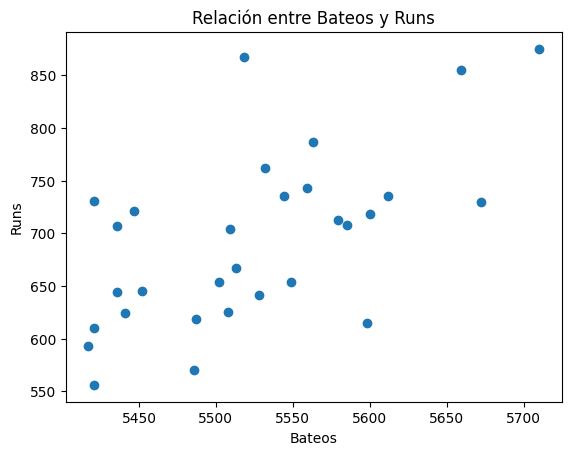

In [3]:

# Relación entre bateos y runs
plt.scatter(datos["bateos"], datos["runs"])
plt.xlabel("Bateos")
plt.ylabel("Runs")
plt.title("Relación entre Bateos y Runs")
plt.show()
    

## Filtrado de Valores Atípicos

In [4]:

# Identificar y eliminar valores atípicos
Q1_bateos = datos["bateos"].quantile(0.25)
Q3_bateos = datos["bateos"].quantile(0.75)
IQR_bateos = Q3_bateos - Q1_bateos

Q1_runs = datos["runs"].quantile(0.25)
Q3_runs = datos["runs"].quantile(0.75)
IQR_runs = Q3_runs - Q1_runs

filtered_data = datos[
    ~(
        ((datos["bateos"] < (Q1_bateos - 1.5 * IQR_bateos)) | (datos["bateos"] > (Q3_bateos + 1.5 * IQR_bateos)))
        | ((datos["runs"] < (Q1_runs - 1.5 * IQR_runs)) | (datos["runs"] > (Q3_runs + 1.5 * IQR_runs)))
    )
]

# Visualizar los datos filtrados
filtered_data.head()
    

,Unnamed: 0,equipos,bateos,runs
0,0,Texas,5659,855
1,1,Boston,5710,875
2,2,Detroit,5563,787
3,3,Kansas,5672,730
4,4,St.,5532,762


## Modelo de Regresión Lineal con Pipeline

In [5]:

# Separar variables predictoras y objetivo
X_filtered = filtered_data[["equipos", "bateos"]]
y_filtered = filtered_data["runs"]

# Configurar preprocesador y pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), ["bateos"]),
        ("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), ["equipos"]),
    ]
)

pipeline = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("regressor", LinearRegression())
    ]
)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(X_filtered, y_filtered, test_size=0.2, random_state=42)

# Entrenar el modelo
pipeline.fit(X_train_f, y_train_f)

# Evaluar el modelo
y_pred_f = pipeline.predict(X_test_f)
mse_f = mean_squared_error(y_test_f, y_pred_f)
r2_f = r2_score(y_test_f, y_pred_f)

print(f"Mean Squared Error (MSE): {mse_f}")
print(f"R^2 Score: {r2_f}")
    

Mean Squared Error (MSE): 7973.666667125901
R^2 Score: -1.3180012275633288


c:\skul\base\env\lib\site-packages\sklearn\preprocessing\_encoders.py:228: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


## Grafica personalizada

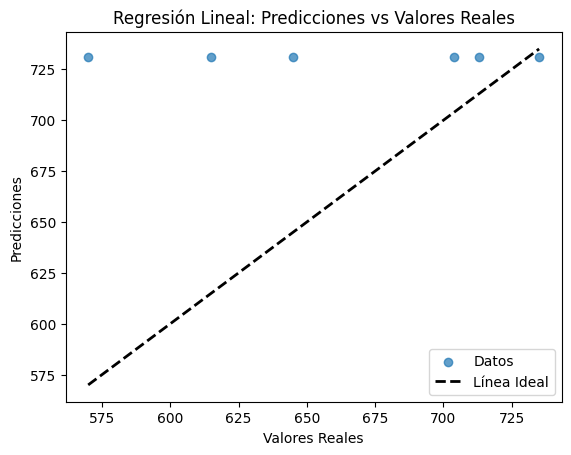

In [7]:
import matplotlib.pyplot as plt

# Gráfica de valores reales vs predicciones
plt.scatter(y_test_f, y_pred_f, alpha=0.7, label="Datos")
plt.plot(
    [y_test_f.min(), y_test_f.max()], 
    [y_test_f.min(), y_test_f.max()], 
    'k--', lw=2, label="Línea Ideal"
)
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.title("Regresión Lineal: Predicciones vs Valores Reales")
plt.legend()
plt.show()
